In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Requirements Calculation

In [78]:
# Physical parameters of the robot
mass = 3 # in kg
wheel_radius = 0.05 # in meters
C_rr = 0.02 # Rolling resistance coefficient

# Motion requirements
max_acceleration = 4 # in m/s²
max_speed = 1 # in m/s²
max_slope_deg = 5 # in degree

# Constant
g = 9.81

/tmp/ipykernel_11539/1409419649.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


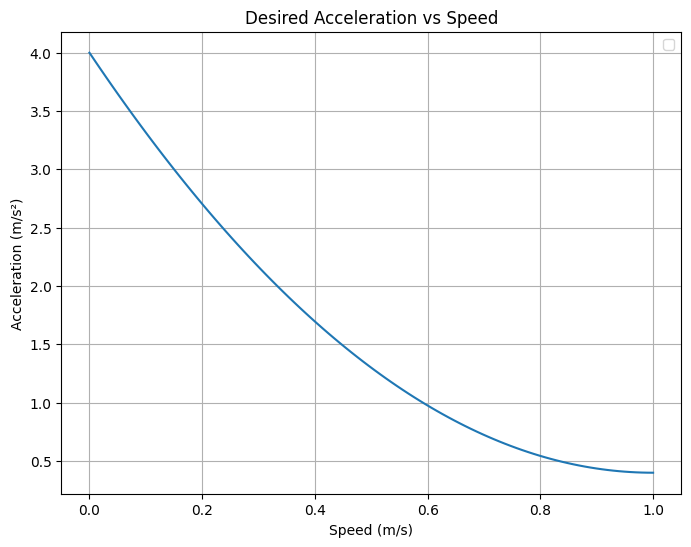

In [79]:
speeds = np.linspace(0, max_speed, 100)
    
# Calculate desired acceleration for each speed
def acceleration(speed):
    """Acceleration profile as a function of speed."""
    return 0.9 * max_acceleration * (1 - (speed / max_speed))**2 + 0.1 * max_acceleration


accelerations = acceleration(speeds)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(speeds, accelerations)
plt.title("Desired Acceleration vs Speed")
plt.xlabel("Speed (m/s)")
plt.ylabel("Acceleration (m/s²)")
plt.grid(True)
plt.legend()
plt.show()

In [80]:
def integrand(v):
        return 1 / acceleration(v)
time, _ = quad(integrand, 0, max_speed)

# Output the result
print(f"Time to accelerate from 0 to {max_speed} m/s: {time:.2f} seconds")

Time to accelerate from 0 to 1 m/s: 1.04 seconds


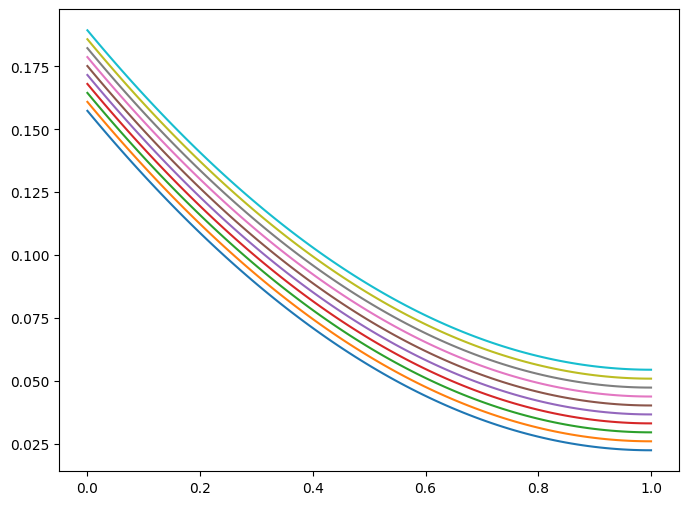

In [81]:
# Convert slope angle to radians
max_slope = np.radians(max_slope_deg)
slopes = np.linspace(0, max_slope, 10)

F_total = []

for slope in slopes:
    # Forces
    F_acc = mass * accelerations  # Acceleration force
    F_gravity = mass * g * np.sin(slope)  # Gravitational force
    F_rolling = C_rr * mass * g * np.cos(slope)  # Rolling resistance force
    
    # Total force
    F_total.append(F_acc + F_gravity + F_rolling)

F_total = np.array(F_total)

# Torque required per wheel
T_wheel = (F_total * wheel_radius)/4

# Plot torque vs. speed for each slope
plt.figure(figsize=(8, 6))

for i, slope in enumerate(slopes):
    plt.plot(speeds, T_wheel[i, :], label=f"Slope = {slope}°")

## Winding Line Calculation

In [82]:
# Given operating speed at no load out of the Datasheet in RPM
no_load_speed_6V = 250 # When operated with 6V

# Given Stall Torque in NM
stall_torque_6V = 0.6

In [83]:
# Winding line when operated with 6V
def winding_line_6V(RPM):
    T = stall_torque_6V * (1 - (RPM/no_load_speed_6V))
    return T

## Plot Results

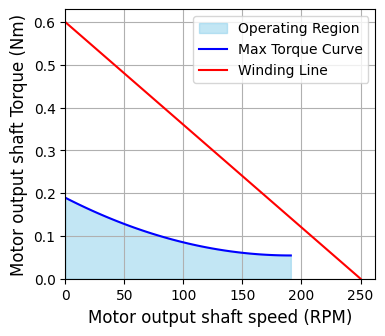

In [88]:
# Generate RPM values for the winding lines
rpm_values = np.linspace(0, 250, 100)

# Plot the operating region
plt.figure(figsize=(4, 3.5))
max_T_wheel = np.max(T_wheel, axis=0)
def speed_to_rpm(speed):
    return (speed * 60) / (2 * np.pi * wheel_radius)
plt.fill_between(speed_to_rpm(speeds), max_T_wheel, color='skyblue', alpha=0.5, label='Operating Region')
plt.plot(speed_to_rpm(speeds), max_T_wheel, color='blue', label='Max Torque Curve')

# Plot the winding line
plt.plot(rpm_values, winding_line_6V(rpm_values), color = "red", label="Winding Line")

# Customize the plot
plt.xlabel('Motor output shaft speed (RPM)', fontsize=12)
plt.ylabel('Motor output shaft Torque (Nm)', fontsize=12)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid(True)
plt.legend()
plt.savefig("Motor_Performance_Analysis_plot.png", dpi=300, bbox_inches='tight') 
plt.show()